# Set the runtime to GPU : Runtime ---> Change runtime type ---> GPU

In [1]:
import numpy as np
import tensorflow
from tensorflow.keras import *
from tensorflow.keras.layers import *
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf

Load dataset:

CiFAR10 handwritten digit dataset is a collection of digits which can be used for classification purposes.

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data() # load the data from keras dataset

print('x_train shape', x_train.shape)
print('x_test shape', x_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

170508288/170498071 [==============================] - 11s 0us/step
x_train shape (50000, 32, 32, 3)
x_test shape (10000, 32, 32, 3)
y_train shape (50000, 1)
y_test shape (10000, 1)


In [4]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

<BarContainer object of 10 artists>

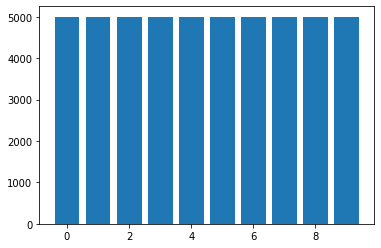

In [5]:
plt.bar(np.unique(y_train, return_counts=True)[0],np.unique(y_train, return_counts=True)[1])

Visualize images

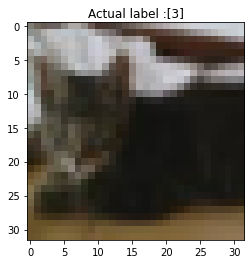

In [6]:
i=9 # index of image you want to see
plt.title('Actual label :'+ str(y_train[i]))
plt.imshow(x_train[i])

Re-arranging the shapes of images for feeding into the Artificial neural networks

In [7]:
x_train = x_train.reshape((x_train.shape[0],-1))
print(x_train.shape)
x_test = x_test.reshape((x_test.shape[0],-1))
print(x_test.shape)

(50000, 3072)
(10000, 3072)


Model building

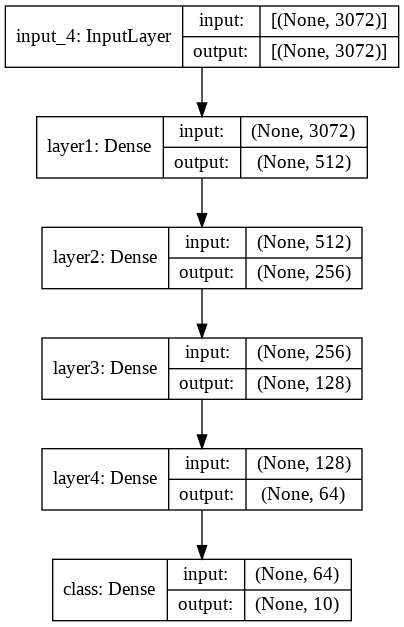

In [20]:
input = Input(shape=(32*32*3)) # the shape of every input is 28x28 = 784

layer1 = Dense(512, activation='relu', name='layer1')(input) # This is a layer having 512 neurons taking input as its feed.
layer2 = Dense(256, activation='relu', name='layer2')(layer1)
layer3 = Dense(128, activation='relu', name='layer3')(layer2)
layer4 = Dense(64, activation='relu', name='layer4')(layer3)
# layer5 = Dropout(0.2)(layer4)
output = Dense(10,activation='softmax', name ='class')(layer4) # activation is softmax for classifiying into 10 classes 

classifier = keras.Model(input,output)
tf.keras.utils.plot_model(classifier,show_shapes=True, show_layer_names=True)

In [21]:
# compile the model

classifier.compile(optimizer = optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

# sparse_categorical_crossentropy is the loss function for sparsly coded labels. 
# eg: shape of y_train = (?,)/(?,1) i.e. single label and not an array

Train the model

In [22]:
classifier.fit(x_train,y_train,batch_size=64,epochs = 10)

Epoch 1/10
782/782 [==============================] - 4s 5ms/step - loss: 12.7857 - accuracy: 0.2261
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 2.1183 - accuracy: 0.3004
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 1.9248 - accuracy: 0.3313
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 1.8256 - accuracy: 0.3581
Epoch 5/10
782/782 [==============================] - 4s 4ms/step - loss: 1.7867 - accuracy: 0.3678
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 1.7485 - accuracy: 0.3799
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 1.7354 - accuracy: 0.3820
Epoch 8/10
782/782 [==============================] - 3s 4ms/step - loss: 1.7040 - accuracy: 0.3924
Epoch 9/10
782/782 [==============================] - 3s 4ms/step - loss: 1.6759 - accuracy: 0.4011
Epoch 10/10
782/782 [==============================] - 4s 4ms/step - loss: 1.6649 - accuracy: 0.402

In [23]:
predictions = classifier.predict(x_test)
print('predictions shape: ', predictions.shape)

# Get the actual labels

y_preds = np.argmax(predictions, axis = -1)
print('Changed shape: ', y_preds.shape)

predictions shape:  (10000, 10)
Changed shape:  (10000,)


In [39]:
score, acc = classifier.evaluate(x_test, y_test,
                            batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.8155 - accuracy: 0.3644
Test score: 1.815485954284668
Test accuracy: 0.3643999993801117


In [54]:
# Computing the accuracy

accuracy = (np.sum(y_preds.reshape((-1,1)) == y_test)/len(y_preds))*100

print('The testing accuracy is ',accuracy,' %')

The testing accuracy is  36.44  %


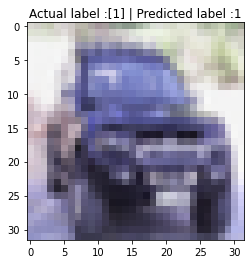

In [40]:
i=9 # index of image you want to see
plt.title('Actual label :' + str(y_test[i]) + ' | Predicted label :' + str(y_preds[i]))
plt.imshow(x_test[i].reshape((32,32,3)))